In [1]:
import pandas as pd
df = pd.read_csv('51job/人工智能.csv', engine='python', encoding='utf8')
print(df.shape)
print(len(df.columns), df.columns)
df.head()

(14383, 5)
5 Index(['company', 'jobRequirement', 'salary', 'tags', 'title'], dtype='object')


,company,jobRequirement,salary,tags,title
0,北京捷通华声科技股份有限公司,"职位描述：, 1.负责智能机器人知识库的建设，保证机器人智能问答的准确率；...",0.7-1万/月,北京 | 无工作经验 | 本科 | 招3人 | 08-14发布,人工智能训练工程师
1,NaN,NaN,NaN,NaN,NaN
2,寰宇优才教育科技（北京）有限公司,"【岗位方向】：,1、 Java+大数据软件开发工程师实习生,2、 人工智能+Python开发...",6-8千/月,北京-朝阳区 | 无工作经验 | 招16人 | 08-14发布,Java+人工智能实习工程师
3,广州市润东信息科技有限公司,"1. 研究机器学习、深度学习等领域的前沿技术并结合业务场景解决实际问题；,2. 通过对数据的...",1.5-2万/月,广州-番禺区 | 3-4年经验 | 本科 | 招1人 | 08-14发布,人工智能工程师
4,江苏厚学网信息技术股份有限公司,"岗位职责:,1. 开发软电话模块，完成与终端呼叫设备的对接；,2. 负责模块的需求分析，代码...",10-20万/年,南京-秦淮区 | 3-4年经验 | 大专 | 招4人 | 08-14发布,C++高级开发工程师(人工智能方向)


In [2]:
#数据处理，删除空行
print('删除空行前共有%d行' %len(df))
df = df.dropna(how='all')
print('删除空行后共有%d行' %len(df))

删除空行前共有14383行
删除空行后共有14304行


In [50]:
#使用jieba库进行中文分词
import pandas as pd
import jieba
import re

df = pd.read_csv('51job/人工智能.csv', engine='python', encoding='utf8')
alltext=df.jobRequirement.dropna().map(str.lower)
text=''
for line in alltext:
    line = line.strip()
    line = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[-+——！，;:：。？、~@#￥%……&*（）]+", " ", line)
    text+=' '+line
top200_keyword = pd.value_counts(list(jieba.cut(text))).iloc[:200]
print(top200_keyword.iloc[:20])

        902474
的       133663
和        41381
有        30979
等        30421
工作       23402
能力       22512
及        20737
你        20113
公司       19500
客户       18878
与        17561
经验       17416
产品       14727
相关       14023
我们       13980
在        13812
团队       13667
开发       13664
人工智能     13262
dtype: int64


In [78]:
import jieba
import jieba.analyse
import jieba.posseg as pseg

stopwords=[]
for word in open('stopword.txt','r',encoding='gb18030'):
    stopwords.append(word.strip())
df = pd.read_csv('51job/人工智能.csv', engine='python', encoding='utf8')
allText = df.jobRequirement.dropna().map(str.lower)
text=''
for line in allText:
    line = line.strip()
    line = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[-+——！，;:：。？、~@#￥%……&*（）]+", " ", line)
    text+=' '+line
words=jieba.cut(text)
nwords=[]
for word in words:
    if word not in stopwords and word!=" ":
        nwords.append(word)
top200_keyword = pd.value_counts(list(nwords)).iloc[:200]
print(top200_keyword.iloc[:50])


工作      23402
能力      22512
公司      19500
客户      18878
经验      17416
产品      14727
相关      14023
团队      13667
开发      13664
人工智能    13262
学习      13107
负责      13067
技术      12778
优先      12548
培训      11592
年       11243
熟悉      11078
沟通      10509
项目      10457
行业      10347
青客      10317
销售       9521
数据       9119
元        8939
服务       8868
提供       8694
专业       7635
业务       7596
管理       7324
发展       7150
强        6991
补贴       6983
分析       6975
需求       6904
中        6482
算法       6241
设计       6238
以上学历     6190
具备       6183
合作       6102
底薪       6041
提成       5898
任职       5853
系统       5639
平台       5484
员工       5454
研发       5188
市场       5014
新        4969
智能       4933
dtype: int64


In [80]:
from pyecharts import WordCloud
import pandas as pd
top50_keyword=top200_keyword.iloc[:50]
wordcloud = WordCloud(width=900, height=600)
wordcloud.add('', list(top50_keyword.index), list(top50_keyword.values), word_size_range=[20,100])

In [4]:
#根据自己设定的关键字绘制词云图
from pyecharts import WordCloud
import pandas as pd

def drawWordCloud(allText):
    with open('keyword.txt', encoding='utf-8') as file:
        keyword_list = [k.strip() for k in file.readlines()]
    count_list = []
    for keyword in keyword_list:
        count_list.append(allText.count(keyword))
    top20_keyword = pd.Series(count_list, index=keyword_list).sort_values(ascending=False).iloc[:20]
    print(top20_keyword)
    wordcloud = WordCloud(width=900, height=600)
    wordcloud.add('', keyword_list, count_list, word_size_range=[20,100])
    return wordcloud

df = pd.read_csv('51job/人工智能.csv', engine='python', encoding='utf8')
allText = ' '.join(df.jobRequirement.dropna().map(str.lower))
print('字符串allText变量的长度:',len(allText))
drawWordCloud(allText)

字符串allText变量的长度: 7164775
人工智能      13262
培训        12148
算法         6389
大数据        5486
科技         5249
计算机        5145
互联网        4954
上海         3597
北京         3139
机器学习       2681
机器人        2535
杭州         2308
责任心        2234
深度学习       2210
java       2172
python     2072
数据库        1681
数据分析       1596
吃苦         1519
软件开发       1443
dtype: int64


In [5]:
# 全国城市的岗位需求量分析
workPlace = df.tags.dropna().map(lambda x:x.split('|')[0].strip())
city = workPlace.map(lambda x:x.split('-')[0])
region = workPlace.map(lambda x:x.split('-')[1] if len(x.split('-'))>1 else '')
city_jobCount = city.value_counts(ascending=False).iloc[:10]
city_jobCount

上海     3027
北京     1835
深圳     1647
广州     1259
杭州     1158
成都      553
武汉      545
南京      448
苏州      406
石家庄     290
Name: tags, dtype: int64

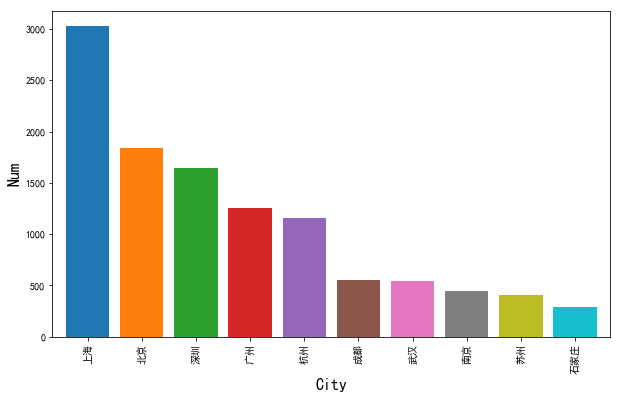

In [7]:
#画出柱状图，可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(10,6))
city_jobCount.plot(kind='bar',width=0.8)
plt.xlabel('City',fontsize=16)
plt.ylabel('Num',fontsize=16)
# plt.bar(city_jobCount.index,city_jobCount.values)
plt.show()
#从图中可看出，人工智能相关职位上海需求量最高，之后分别是北京、深圳、广州、杭州、成都等城市。

In [8]:
#统计上海地区工作岗位的分布
shanghai_region = region[city=='上海']
region_count_series = shanghai_region.value_counts().drop([''])
region_count_series

浦东新区    579
徐汇区     347
嘉定区     266
杨浦区     224
静安区     162
闵行区     148
宝山区     131
普陀区     106
黄浦区     103
松江区      99
奉贤区      77
长宁区      72
虹口区      63
青浦区      54
金山区      28
Name: tags, dtype: int64

In [9]:
#数据可视化，热力图
from pyecharts import Map
map1 = Map('上海各区岗位需求量', width=900, height=800)
attr = region_count_series.index
value = region_count_series.values/region_count_series.max() * 100
map1.add('', attr, value, maptype='上海', is_visualmap=True, is_label_show=True)
map1

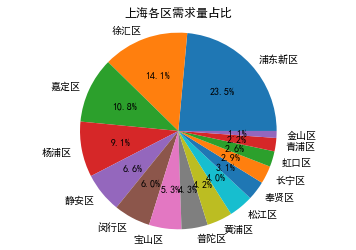

In [21]:
#数据可视化，饼图
value2 = region_count_series.values/region_count_series.max() * 100
plt.pie(value2,labels=attr,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('上海各区需求量占比')
plt.show()
#从图中可以看出，上海市的人工智能相关职位需求量浦东新区最高，之后分别是徐汇区、嘉定区、杨浦区、静安区等

In [10]:
#统计杭州地区工作岗位的分布
shanghai_region = region[city=='杭州']
region_count_series = shanghai_region.value_counts().drop([''])
region_count_series

余杭区    185
滨江区    179
西湖区    149
江干区     60
拱墅区     55
萧山区     34
临安区     12
下城区      7
上城区      5
建德市      2
富阳区      1
Name: tags, dtype: int64

In [11]:
#数据可视化，热力图
from pyecharts import Map
map1 = Map('杭州各区岗位需求量', width=900, height=800)
attr = region_count_series.index
value = region_count_series.values/region_count_series.max() * 100
map1.add('', attr, value, maptype='杭州', is_visualmap=True, is_label_show=True)
map1

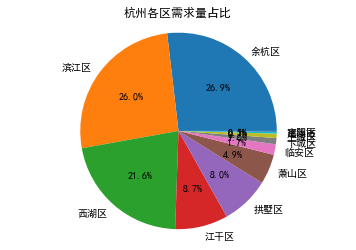

In [12]:
#数据可视化，饼图
value2 = region_count_series.values/region_count_series.max() * 100
plt.pie(value2,labels=attr,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('杭州各区需求量占比')
plt.show()
#从图中可以看出，杭州市的人工智能相关职位需求量余杭区最高，之后分别是滨江区、西湖区，江干区等

In [13]:
#学历要求分析(51job)
df = pd.read_csv('51job/51job.csv',engine='python', encoding='utf8')
print(df.head())
print(df.columns)
print(df.shape)
#数据处理，删除空行
print('删除空行前共有%d行' %len(df))
df = df.dropna(how='all')
print('删除空行后共有%d行' %len(df))

   Unnamed: 0               title           company    min_salary  ave_salary  \
0           0           人工智能训练工程师    北京捷通华声科技股份有限公司   7000.000000      8500.0   
1           2      Java+人工智能实习工程师  寰宇优才教育科技（北京）有限公司   6000.000000      7000.0   
2           3             人工智能工程师     广州市润东信息科技有限公司  15000.000000     17500.0   
3           4  C++高级开发工程师(人工智能方向)   江苏厚学网信息技术股份有限公司   8333.333333     12500.0   
4           5        零基础人工智能开发实习生     郑州汇之众网络科技有限公司   6000.000000      7000.0   

     max_salary workspace experienceRequirement educationRequirement  \
0  10000.000000      北京                 无工作经验                   本科     
1   8000.000000        北京               无工作经验                    无要求   
2  20000.000000        广州              3-4年经验                   本科     
3  16666.666667        南京              3-4年经验                   大专     
4   8000.000000      郑州                 无工作经验                   本科     

   recruits                                     jobRequirement publishTime  
0  

(11741,)


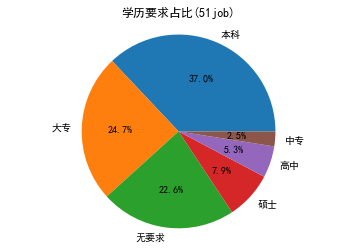

In [23]:
# 学历要求分析(51job)
er=df.educationRequirement
value=[i.strip() for i in er.values]
edu=pd.Series(value,index=er.index)
print(edu.shape)
# print(edu)
count_edu = edu.value_counts(ascending=False)
count_edu = count_edu[count_edu/count_edu.sum()>0.01]
plt.pie(count_edu.values,labels=count_edu.index,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('学历要求占比(51job)')
plt.show()

(4733, 13)
本科      2901
硕士      1219
大专       318
学历不限     207
博士        74
Name: 学历要求, dtype: int64


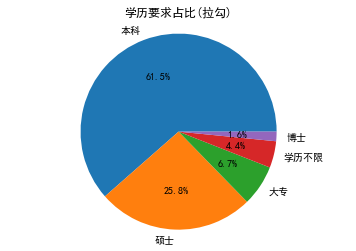

In [29]:
#学历要求分析(拉勾网)
keyword_list = ['NLP', '机器学习', '人工智能', '人脸识别', '深度学习',
               '算法研究员', '图像识别', '无人驾驶', '语音识别']
fileName_list = ['拉勾/'+k+'.csv' for k in keyword_list]
df_list = [pd.read_csv(open(fileName, encoding='utf8')) for fileName in fileName_list]
df_all = pd.concat(df_list)
df_all = df_all.reset_index(drop=True)
print(df_all.shape)
# print(df_all)
#数据处理，删除空行
# print('删除空行前共有%d行' %len(df_all))
df_all = df_all.dropna(how='all')
# print('删除空行后共有%d行' %len(df_all))
edu=pd.Series(df_all['学历要求'].str.strip('及以上'))
count_edu = edu.value_counts(ascending=False)
count_edu = count_edu[count_edu/count_edu.sum()>0.01]
print(count_edu)
plt.pie(count_edu.values,labels=count_edu.index,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('学历要求占比(拉勾)')
plt.show()
#根据实际情况，拉勾网比51job的数据更靠谱一些

In [36]:
#薪资对比
import pandas as pd 

keyword_list = ['NLP', '机器学习', '人工智能', '人脸识别', '深度学习',
               '算法研究员', '图像识别', '无人驾驶', '语音识别']
fileName_list = ['拉勾/'+k+'.csv' for k in keyword_list]
df_list = [pd.read_csv(open(fileName, encoding='utf8')) for fileName in fileName_list]
salary_list = [df['薪资区间'].dropna() for df in df_list]  
salary_list2 = [salary[salary.str.contains('-')] for salary in salary_list]
salary_list3 = [salary.map(lambda x:x.lower().replace('k','000')) for salary in salary_list2]
# print(salary_list3)
for salary in salary_list3:
    print(len(salary))

445
897
448
450
447
448
899
235
445


In [85]:
#获取较低值、较高值、平均值
import numpy as np
salaryLow_list = [salary.map(lambda x:int(x.split('-')[0])).quantile(0.5) for salary in salary_list3]
salaryHigh_list = [salary.map(lambda x:int(x.split('-')[1])).quantile(0.5) for salary in salary_list3]
salaryAvg_list = [salary.map(lambda x:np.average([int(k) for k in x.split('-')])).quantile(0.5) for salary in salary_list3]
print(salaryLow_list,sum(salaryLow_list)/len(salaryLow_list))
print(salaryHigh_list,sum(salaryHigh_list)/len(salaryHigh_list))
print(salaryAvg_list,sum(salaryAvg_list)/len(salaryAvg_list))

[20000.0, 15000.0, 15000.0, 15000.0, 20000.0, 20000.0, 12000.0, 15000.0, 18000.0] 16666.666666666668
[40000.0, 30000.0, 30000.0, 30000.0, 35000.0, 35000.0, 20000.0, 30000.0, 30000.0] 31111.11111111111
[30000.0, 22500.0, 22500.0, 22500.0, 27500.0, 27500.0, 17500.0, 22500.0, 24000.0] 24055.555555555555


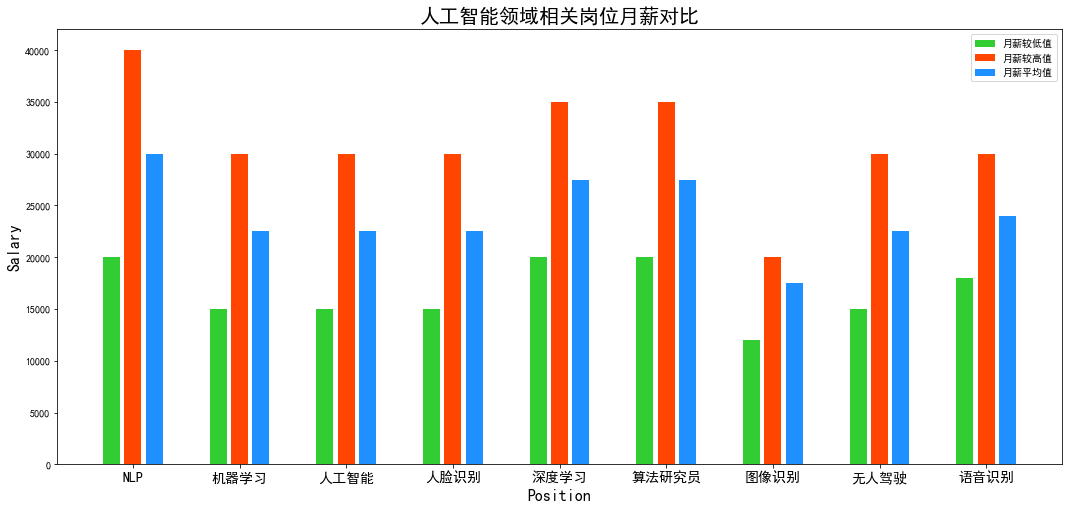

In [86]:
#可视化
plt.figure(figsize=(18,8))
min_x = range(1, 42, 5)
max_x = range(2, 43, 5)
avg_x = range(3, 44, 5)
plt.bar(min_x, salaryLow_list, color='limegreen', label='月薪较低值')
plt.bar(max_x, salaryHigh_list, color='orangered', label='月薪较高值')
plt.bar(avg_x, salaryAvg_list, color='dodgerblue', label='月薪平均值')
plt.xticks(range(2, 45, 5), keyword_list, fontsize=14)
plt.xlabel('Position', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('人工智能领域相关岗位月薪对比',fontsize=20)
plt.legend()
plt.show()